In [18]:
from src.Sharq import *

In [19]:
import warnings
warnings.simplefilter(action='ignore',category=FutureWarning)
warnings.filterwarnings("ignore")

In [20]:
# get adult dataset
adult = pd.read_csv('Datasets/adult.csv')
adult.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [21]:
# create single rules set for adult dataset with some default parameters (e.g support threshold=0.05, score function=IS score function, dataset sample = 10000 etc.)
adults_rules_set = create_single_rules_set('adult', 4, 40, 10000, is_score_function, 0.05, 0.05)

In [22]:
adults_rules_set.head()

,score,lift,support,confidence,lhs,rhs
0,0.374134,1.121001,0.124867,0.687135,"['age_(0, 25]']","['educational-num_(8, 12]']"
1,0.484695,1.315100,0.178640,0.983041,"['age_(0, 25]']",['income_<=50K']
2,0.590407,3.628478,0.096068,0.659373,['relationship_Own-child'],"['age_(0, 25]']"
3,0.590407,3.628478,0.096068,0.528655,"['age_(0, 25]']",['relationship_Own-child']
4,0.436191,1.195975,0.159086,0.875439,"['age_(0, 25]']",['workclass_Private']


In [23]:
# create SHARQ class instance with adults_rules_set
sharq = Sharq(rules_set=adults_rules_set)
results = sharq.run_sharq()

In [24]:
sharq.set_orig_dataset('adult') 

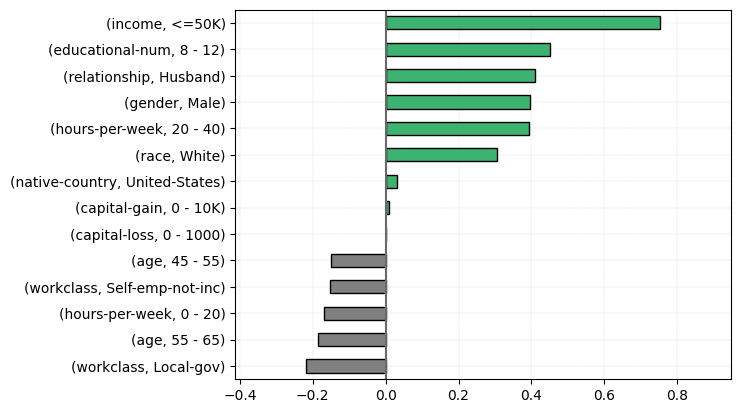

In [25]:
# get SHARQ results of the top and bottom 5 elements with a frequency threshold of 2%
sharq.get_elements_table_bar_visualization(top_bottom_elements_num=5, frequency_threshold=2)

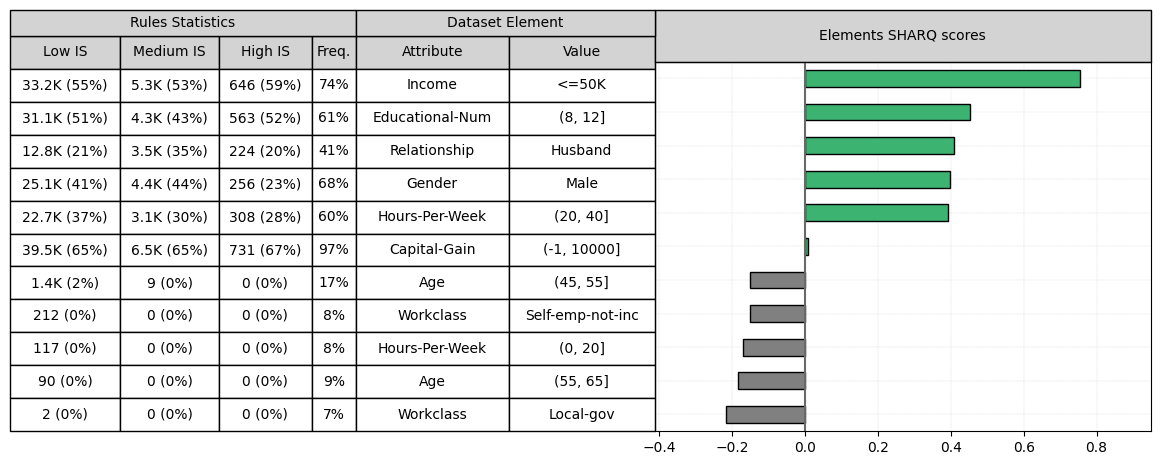

<Figure size 640x480 with 0 Axes>

In [26]:
# get extended SHARQ results of the top and bottom 5 elements with a frequency threshold of 2% and the elements statistics within the rules set
sharq.get_elements_table_bar_visualization(top_bottom_elements_num=5, frequency_threshold=2, expanded=True)

<Figure size 640x480 with 0 Axes>

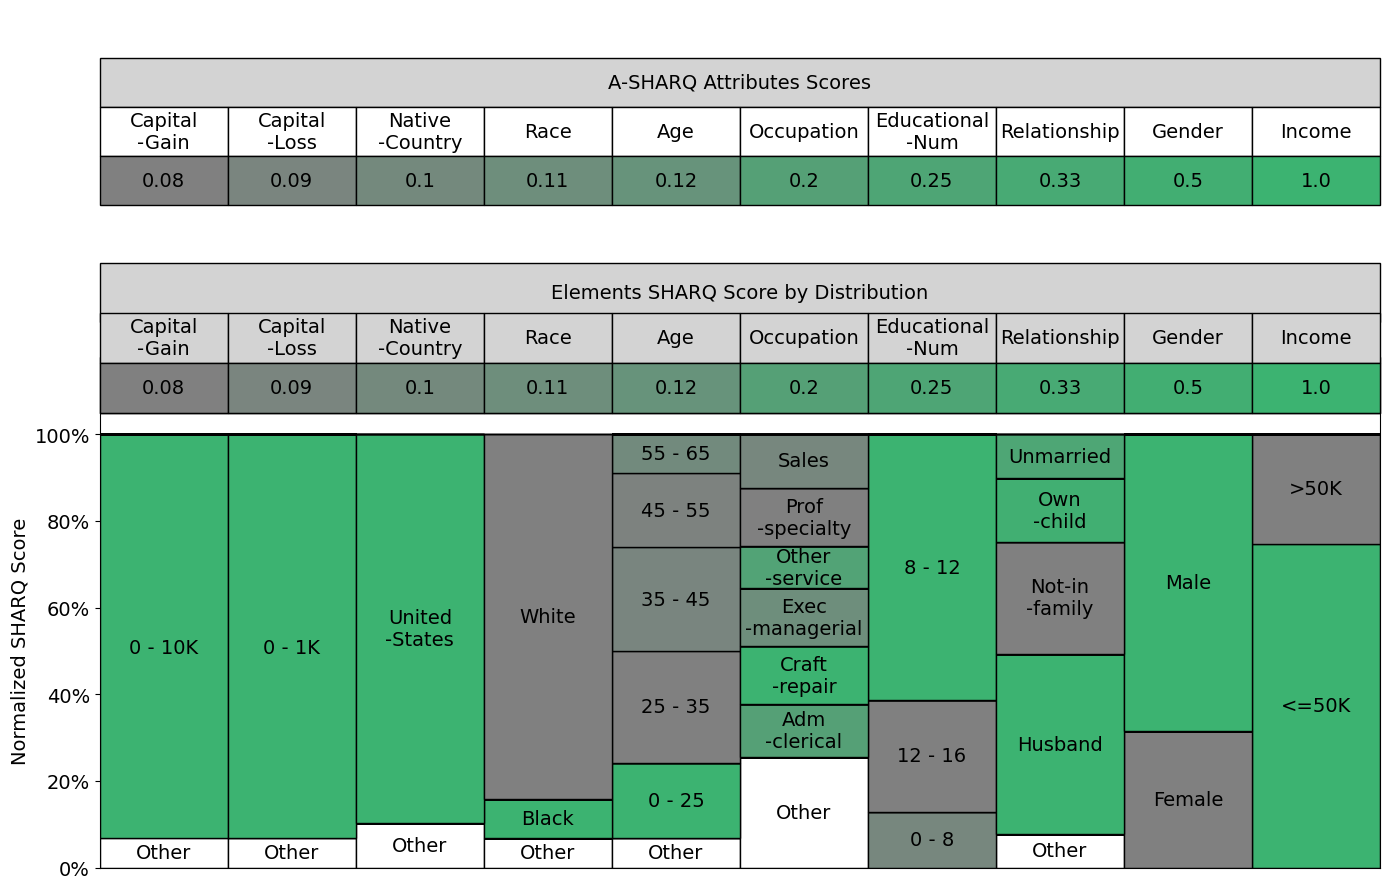

In [27]:
# get attributes visualization of the SHARQ results
sharq.get_attributes_visualization(top_bottom_elements_num=5)

In [28]:
normalized_results = sharq.get_normalized_sharq()

In [29]:
normalized_results

{'income_<=50K': 5.0,
 'educational-num_(8, 12]': 4.0,
 'relationship_Husband': 3.3333333333333335,
 'occupation_Craft-repair': 2.090909090909091,
 'relationship_Own-child': 2.0,
 'hours-per-week_(20, 40]': 1.8,
 'income_>50K': 1.7777777777777777,
 'gender_Male': 1.75,
 'age_(0, 25]': 1.5,
 'occupation_Adm-clerical': 1.4705882352941178,
 'relationship_Unmarried': 1.4210526315789473,
 'occupation_Other-service': 1.4,
 'gender_Female': 1.375,
 'occupation_Machine-op-inspct': 1.36,
 'race_Black': 1.1111111111111112,
 'hours-per-week_(0, 20]': 1.0,
 'workclass_Self-emp-not-inc': 1.0,
 'workclass_Private': 1.0,
 'workclass_Local-gov': 0.9705882352941176,
 'educational-num_(0, 8]': 0.9230769230769231,
 'hours-per-week_(40, 60]': 0.9230769230769231,
 'occupation_Exec-managerial': 0.9130434782608695,
 'occupation_Sales': 0.896551724137931,
 'age_(55, 65]': 0.8787878787878788,
 'educational-num_(12, 16]': 0.8333333333333334,
 'occupation_Prof-specialty': 0.7857142857142857,
 'age_(35, 45]': 0.7

In [30]:
results

{'workclass_Local-gov': np.float64(-0.21794307672063573),
 'age_(55, 65]': np.float64(-0.18437930740816755),
 'hours-per-week_(0, 20]': np.float64(-0.1696041267149362),
 'workclass_Self-emp-not-inc': np.float64(-0.1515815483599726),
 'age_(45, 55]': np.float64(-0.14994714267587164),
 'occupation_Sales': np.float64(-0.14139947059093205),
 'occupation_Prof-specialty': np.float64(-0.12578318223408827),
 'race_Black': np.float64(-0.11942154179890578),
 'educational-num_(0, 8]': np.float64(-0.09951339278830947),
 'occupation_Machine-op-inspct': np.float64(-0.09231922889763514),
 'age_(35, 45]': np.float64(-0.0914002580721772),
 'occupation_Exec-managerial': np.float64(-0.08528342816728521),
 'relationship_Not-in-family': np.float64(-0.08502533242945375),
 'age_(25, 35]': np.float64(-0.05498835077353126),
 'occupation_Other-service': np.float64(-0.03159916218272977),
 'relationship_Unmarried': np.float64(-0.016342927250035826),
 'educational-num_(12, 16]': np.float64(-0.007820174246881603),


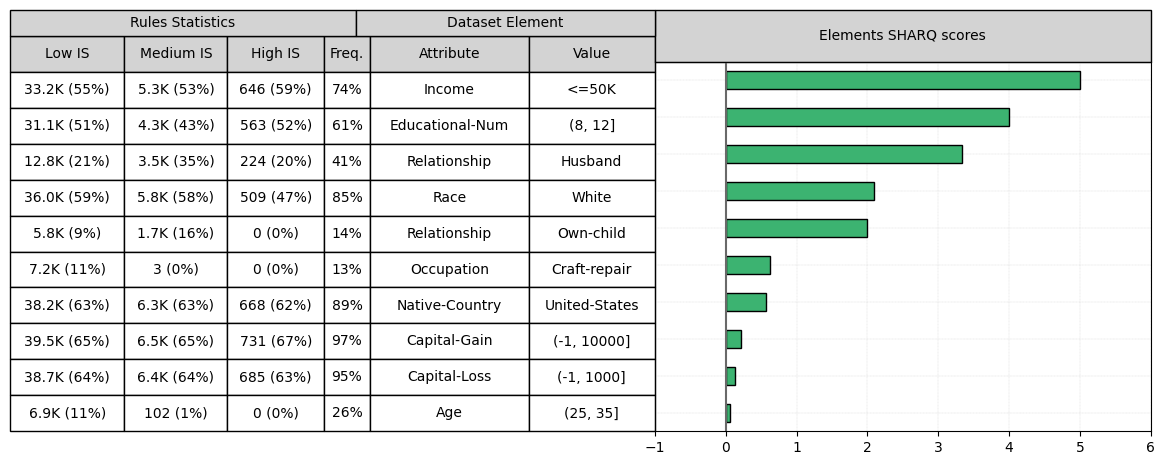

<Figure size 640x480 with 0 Axes>

In [31]:
# get the SHARQ results visualization of the normalized SHARQ scores of the top and bottom 5 elements
sharq.get_elements_table_bar_visualization(top_bottom_elements_num=5, frequency_threshold=2, expanded=True, normalized=True)

In [32]:
# add each rule's SHARQ score to the rules set
sharq.add_sharq_score_to_rules_set()
sharq.rules_set.head()

,score,lift,support,confidence,lhs,rhs,elements,num_of_elements,SHARQ score
0,0.374134,1.121001,0.124867,0.687135,"['age_(0, 25]']","['educational-num_(8, 12]']","[age_(0, 25], educational-num_(8, 12]]",2,0.062209
1,0.484695,1.315100,0.178640,0.983041,"['age_(0, 25]']",['income_<=50K'],"[age_(0, 25], income_<=50K]",2,0.062209
2,0.590407,3.628478,0.096068,0.659373,['relationship_Own-child'],"['age_(0, 25]']","[age_(0, 25], relationship_Own-child]",2,0.062209
3,0.590407,3.628478,0.096068,0.528655,"['age_(0, 25]']",['relationship_Own-child'],"[age_(0, 25], relationship_Own-child]",2,0.062209
4,0.436191,1.195975,0.159086,0.875439,"['age_(0, 25]']",['workclass_Private'],"[age_(0, 25], workclass_Private]",2,0.062209


In [33]:
# sort rules set by lift score (descending) and sharq score (ascending)
sharq.rules_set = sharq.rules_set.sort_values(by=['lift', 'SHARQ score'], ascending=[False, True])
sharq.rules_set.head(15)

,score,lift,support,confidence,lhs,rhs,elements,num_of_elements,SHARQ score
23349,0.531372,4.119339,0.068544,0.673278,"['race_White', 'relationship_Own-child', 'work...","['age_(0, 25]', 'income_<=50K', 'native-countr...","[age_(0, 25], income_<=50K, native-country_Uni...",6,0.031862
45128,0.530825,4.117250,0.068438,0.672936,"['capital-gain_(-1, 10000]', 'race_White', 're...","['age_(0, 25]', 'income_<=50K', 'native-countr...","[age_(0, 25], capital-gain_(-1, 10000], income...",7,0.008458
45694,0.523699,4.116091,0.066631,0.672747,"['capital-loss_(-1, 1000]', 'race_White', 'rel...","['age_(0, 25]', 'income_<=50K', 'native-countr...","[age_(0, 25], capital-loss_(-1, 1000], income_...",7,0.001038
45146,0.530721,4.115628,0.068438,0.672234,"['race_White', 'relationship_Own-child', 'work...","['age_(0, 25]', 'capital-gain_(-1, 10000]', 'i...","[age_(0, 25], capital-gain_(-1, 10000], income...",7,0.008458
63691,0.523144,4.113940,0.066525,0.672395,"['capital-gain_(-1, 10000]', 'capital-loss_(-1...","['age_(0, 25]', 'income_<=50K', 'native-countr...","[age_(0, 25], capital-gain_(-1, 10000], capita...",8,0.001038
63725,0.523033,4.112200,0.066525,0.671674,"['capital-loss_(-1, 1000]', 'race_White', 'rel...","['age_(0, 25]', 'capital-gain_(-1, 10000]', 'i...","[age_(0, 25], capital-gain_(-1, 10000], capita...",8,0.001038
45125,0.529845,4.102050,0.068438,0.680042,"['income_<=50K', 'race_White', 'relationship_O...","['age_(0, 25]', 'capital-gain_(-1, 10000]', 'n...","[age_(0, 25], capital-gain_(-1, 10000], income...",7,0.008458
23338,0.529988,4.097912,0.068544,0.681098,"['income_<=50K', 'race_White', 'relationship_O...","['age_(0, 25]', 'native-country_United-States']","[age_(0, 25], income_<=50K, native-country_Uni...",6,0.031862
45108,0.529446,4.095884,0.068438,0.680761,"['capital-gain_(-1, 10000]', 'income_<=50K', '...","['age_(0, 25]', 'native-country_United-States']","[age_(0, 25], capital-gain_(-1, 10000], income...",7,0.008458
45711,0.522002,4.089467,0.066631,0.654489,"['race_White', 'relationship_Own-child', 'work...","['age_(0, 25]', 'capital-loss_(-1, 1000]', 'in...","[age_(0, 25], capital-loss_(-1, 1000], income_...",7,0.001038


In [34]:
# sort rules set by sharq score (descending) and lift score (ascending)
sharq.rules_set = sharq.rules_set.sort_values(by=['SHARQ score', 'lift'], ascending=[False, True])
sharq.rules_set.head(15)

,score,lift,support,confidence,lhs,rhs,elements,num_of_elements,SHARQ score
19,0.733952,1.084285,0.496812,0.664629,['income_<=50K'],"['educational-num_(8, 12]']","[educational-num_(8, 12], income_<=50K]",2,0.452343
20,0.733952,1.084285,0.496812,0.810506,"['educational-num_(8, 12]']",['income_<=50K'],"[educational-num_(8, 12], income_<=50K]",2,0.452343
634,0.399103,1.077539,0.147821,0.660494,"['income_<=50K', 'relationship_Husband']","['educational-num_(8, 12]']","[educational-num_(8, 12], income_<=50K, relati...",3,0.409652
575,0.574338,1.071460,0.307864,0.656767,"['gender_Male', 'income_<=50K']","['educational-num_(8, 12]']","[educational-num_(8, 12], gender_Male, income_...",3,0.396757
576,0.574338,1.071460,0.307864,0.502254,"['educational-num_(8, 12]']","['gender_Male', 'income_<=50K']","[educational-num_(8, 12], gender_Male, income_...",3,0.396757
4820,0.399103,1.077539,0.147821,0.660494,"['gender_Male', 'income_<=50K', 'relationship_...","['educational-num_(8, 12]']","[educational-num_(8, 12], gender_Male, income_...",4,0.396757
773,0.507044,1.148744,0.223804,0.538481,['relationship_Husband'],"['gender_Male', 'income_<=50K']","[gender_Male, income_<=50K, relationship_Husband]",3,0.396757
4823,0.442324,1.323561,0.147821,0.620428,"['educational-num_(8, 12]', 'relationship_Husb...","['gender_Male', 'income_<=50K']","[educational-num_(8, 12], gender_Male, income_...",4,0.396757
582,0.578380,1.404042,0.238257,0.583550,"['educational-num_(8, 12]', 'gender_Male']",['relationship_Husband'],"[educational-num_(8, 12], gender_Male, relatio...",3,0.396757
583,0.578380,1.404042,0.238257,0.573255,['relationship_Husband'],"['educational-num_(8, 12]', 'gender_Male']","[educational-num_(8, 12], gender_Male, relatio...",3,0.396757
